In [1]:
import sys
import os

sys.path.insert(0, os.path.dirname(os.getcwd()) + '/code')
import scoring
from inspect import getmembers, isfunction
import utils
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
! pwd

/pollard/data/projects/kgjoni/Akita/akita_imaging/scoring_methods/contact_map_scoring/notebooks


# Examples of applying scoring functions

In this notebook, we load two example maps and run all scoring functions to compare these maps.

# Import example maps and plot random deletion

In [2]:
filepath =  os.path.dirname(os.getcwd()) + "/data/example_maps/"
metadata_path = filepath + "example_map_info.csv"
metadata = pd.read_csv(metadata_path)
metadata.head(6)

,chrom,start,stop,description
0,chr21,22792153,22792172,ctcf
1,chr2,215270027,215270046,ctcf
2,chr7,76020296,76020315,ctcf
3,chr8,48925790,48925809,ctcf
4,chr1,155399760,155400575,random
5,chr1,222455110,222455425,random


In [3]:
index = 4 # Pick example map
wt_matrix, del_matrix, title = utils.load_map(index, metadata, filepath)

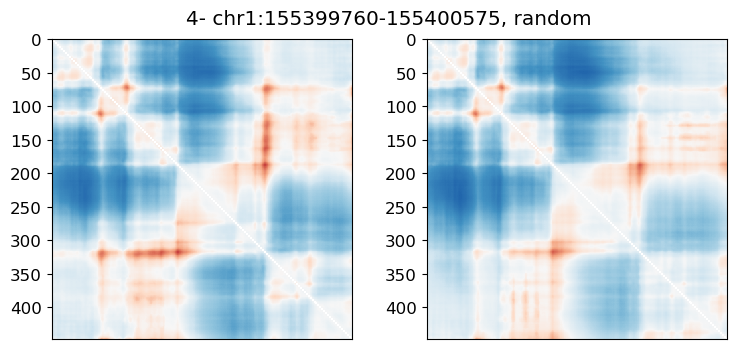

In [4]:
utils.simple_plot(wt_matrix, del_matrix, title = str(index) + "- " +  title )

In [5]:
# Defined scoring functions
print([o[0] for o in getmembers(scoring,isfunction) if o[1].__module__ == scoring.__name__])


['Loops', 'TAD', 'contact_directionality_track', 'correlation', 'distance_enrichment_track', 'downres', 'eigenvector_track', 'fill_missing_points_map', 'fill_tril', 'findloops', 'insulation_track', 'mse', 'mse_1D', 'remove_missing_points_flat', 'run_scoring_functions', 'scc', 'spearman_1D', 'ssim_map', 'triangle_track', 'vectorMethodToScalar']


# Run scoring functions

## All

In [6]:
scoring_results = scoring.run_scoring_functions(wt_matrix, del_matrix)
scoring_results

{'mse': 0.04006148318921043,
 'correlation': 0.9071129226811407,
 'ssim': 0.6495724926374357,
 'scc': 0.9124907763169725,
 'eigenvector_corr': 0.7923975351638988,
 'contact_directionality_corr': 0.9288728378315954,
 'insulation_mse': 0.006486480179263471,
 'insulation_corr': 0.8966907003534922,
 'distance_enrichment_corr': 0.8456199320777098,
 'triangle_mse': 0.0030405289329846073,
 'triangle_corr': 0.9510527282209232,
 'Loops': 0.8,
 'TADs': 0.7777777777777778}

## Matrix methods

### Correlation

In [9]:
scoring.correlation(wt_matrix, del_matrix)

0.9071129226811407

### MSE

In [7]:
scoring.mse(wt_matrix, del_matrix)

0.04006148318921043

### SSIM

In [10]:
scoring.ssim_map(wt_matrix, del_matrix)

0.6495724926374357

## Contact map methods

### Contact directionality (corr)

In [13]:
scoring.vectorMethodToScalar(scoring.contact_directionality_track, wt_matrix, del_matrix, finalCompMetric = 'corr')

0.9288728378315954

### Distance enrichment (corr)

In [14]:
scoring.vectorMethodToScalar(scoring.distance_enrichment_track, wt_matrix, del_matrix, finalCompMetric = 'corr')

0.8456199320777098

### Eigenvector (corr)

In [15]:
scoring.vectorMethodToScalar(scoring.eigenvector_track, wt_matrix, del_matrix, finalCompMetric = 'corr')

0.7923975351638988

### Insulation (corr)

In [16]:
scoring.vectorMethodToScalar(scoring.insulation_track, wt_matrix, del_matrix, finalCompMetric = 'corr')

0.8966907003534922

### Insulation (mse)

In [17]:
scoring.vectorMethodToScalar(scoring.insulation_track, wt_matrix, del_matrix, finalCompMetric = 'mse')

0.006486480179263471

### Loops

In [21]:
scoring.Loops(wt_matrix, del_matrix)['overlap_ratio']

0.8

### SCC

In [22]:
scoring.scc(wt_matrix, del_matrix)

0.9124907763169725

### TADs

In [23]:
scoring.TAD(wt_matrix, del_matrix)['overlap_ratio']

0.7777777777777778

### Triangle (corr)
Triangle is run on maps with lower resolution since it's slow and computationally intensive

In [25]:
scoring.vectorMethodToScalar(scoring.triangle_track, 
                             scoring.downres(wt_matrix,new_resolution = 4681),
                             scoring.downres(del_matrix,new_resolution = 4681), 
                             finalCompMetric = 'corr')

0.9510527282209232

### Triangle (mse)
Triangle is run on maps with lower resolution since it's slow and computationally intensive

In [26]:
scoring.vectorMethodToScalar(scoring.triangle_track, 
                             scoring.downres(wt_matrix,new_resolution = 4681),
                             scoring.downres(del_matrix,new_resolution = 4681), 
                             finalCompMetric = 'mse')

0.0030405289329846073

# Get and plot 1D intermediate tracks for each map (when applicable)

## Contact directionality

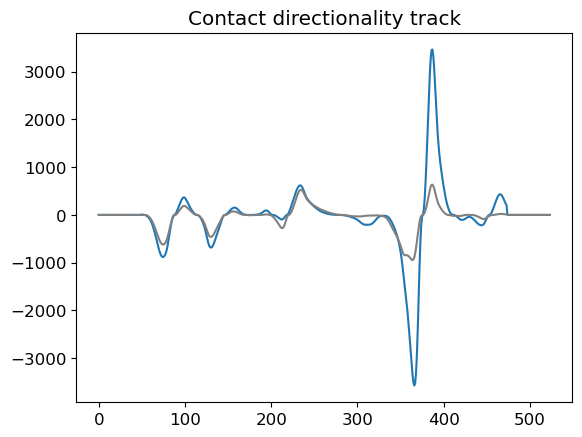

In [31]:
wt_contact_directionality_track = scoring.contact_directionality_track(wt_matrix)
del_contact_directionality_track = scoring.contact_directionality_track(del_matrix)

plt.plot(wt_contact_directionality_track)
plt.plot(del_contact_directionality_track, c='grey')
plt.title('Contact directionality track')
plt.show()

## Distance enrichment

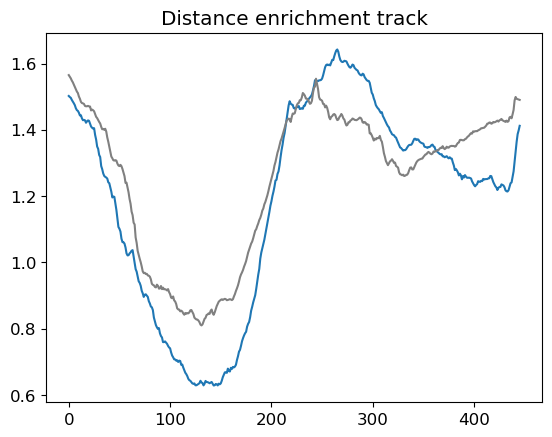

In [32]:
wt_distance_enrichment_track = scoring.distance_enrichment_track(wt_matrix)
del_distance_enrichment_track = scoring.distance_enrichment_track(del_matrix)

plt.plot(wt_distance_enrichment_track)
plt.plot(del_distance_enrichment_track, c='grey')
plt.title('Distance enrichment track')
plt.show()

## Eigenvector

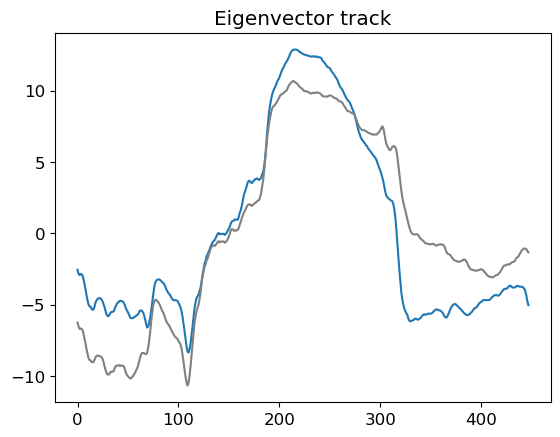

In [34]:
wt_eigenvector_track = scoring.eigenvector_track(wt_matrix)
del_eigenvector_track = scoring.eigenvector_track(del_matrix)

plt.plot(wt_eigenvector_track)
plt.plot(del_eigenvector_track, c='grey')
plt.title('Eigenvector track')
plt.show()

## Insulation

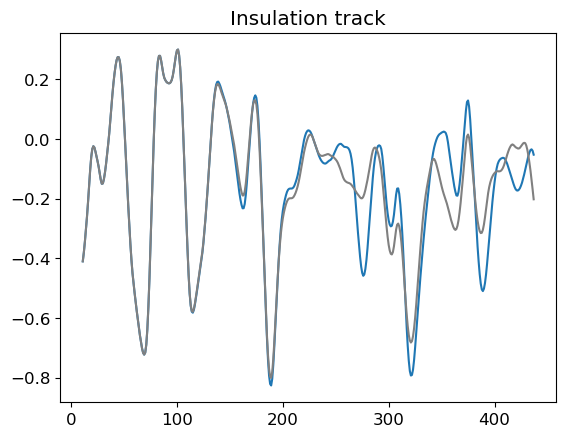

In [33]:
wt_insulation_track = scoring.insulation_track(wt_matrix)
del_insulation_track = scoring.insulation_track(del_matrix)

plt.plot(wt_insulation_track)
plt.plot(del_insulation_track, c='grey')
plt.title('Insulation track')
plt.show()